# Twitter Dataset

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle


### Load Data

In [3]:
df=pd.read_csv('/kaggle/input/twitter/twitter_training.csv')

### Data Cleaning

In [4]:
# Assigning proper column names
column_names = ['ID', 'Category', 'Sentiment', 'Tweet']
df.columns = column_names
print(df.columns)

Index(['ID', 'Category', 'Sentiment', 'Tweet'], dtype='object')


### Data Analysis

In [13]:
df.head()

,ID,Category,Sentiment,Tweet,Cleaned_Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im get borderland murder


In [12]:
f"Shape of data: {df.shape}"

'Shape of data: (74681, 4)'

In [13]:
# check for null
df.isnull().sum()

ID             0
Category       0
Sentiment      0
Tweet        686
dtype: int64

In [14]:
# check the y variable values
df['Sentiment'].value_counts()

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

### Download the stop words

stop words in English include "and," "the," "is," "in," "at," "which," and "on." which can be filtered out.

The main purpose of removing stop words is to reduce the amount of data that needs to be processed without losing important information, thereby improving the efficiency and effectiveness of text processing tasks such as search indexing, text mining, and information retrieval.

In [5]:
#download stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
print(stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any'

In [6]:
# Initialize the PorterStemmer and stop words
port_stem = PorterStemmer()

def clean_text(text):
    if isinstance(text, float):  # Check if the text is a float (NaN)
        text = ''
    
    text = re.sub('[^a-zA-Z]', ' ', text)  # Replace all non-alphabetic characters with spaces
    text = text.lower()  # Convert text to lowercase
    
    words = text.split()  # Split the text into individual words
    
    # Stem each word and remove stop words
    words = [port_stem.stem(word) for word in words if word not in stopwords]
    
    words = ' '.join(words)  # Join the words back into a single string
    
    return words  # Return the cleaned text

The `clean_text` function performs the following operations on the input text:

* Handles missing values by converting NaNs to empty strings.
* Removes non-alphabetic characters.
* Converts the text to lowercase.
* Splits the text into words.
* Removes stop words and applies stemming.
* Joins the processed words back into a single string and returns it.

In [7]:
# Apply the clean_text function to the 'Tweet' column
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

In [8]:
# Display the first few rows of the cleaned data
df[['Tweet', 'Cleaned_Tweet']].head()

,Tweet,Cleaned_Tweet
0,I am coming to the borders and I will kill you...,come border kill
1,im getting on borderlands and i will kill you ...,im get borderland kill
2,im coming on borderlands and i will murder you...,im come borderland murder
3,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,im getting into borderlands and i can murder y...,im get borderland murder


### Model Training

train test split

In [9]:
# X,y 
X=df['Cleaned_Tweet'].values
y=df['Sentiment'].values

In [10]:
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

f"X : {X.shape}, X_train: {X_train.shape}, X_test:{X_test.shape}"

'X : (74681,), X_train: (59744,), X_test:(14937,)'

### What is TF-IDF?

- **Term Frequency (TF)**: Measures how frequently a term appears in a document. The more frequently a term appears in a document, the higher its TF value.
- **Inverse Document Frequency (IDF)**: Measures how important a term is. It is the logarithmically scaled inverse fraction of the documents that contain the term. A term that appears in many documents will have a low IDF value.

The TF-IDF score for a term is calculated as:
$$\ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t) \$$



In [11]:
vectorizer = TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)


#### Train Logistic Regression

In [12]:
#Training the machine learning model
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Model Evaluaiton

In [13]:
#AccuracyScore on training data
X_train_prediction=lr_model.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_prediction)
print("Accuracy score on the training data: ",training_data_accuracy)

Accuracy score on the training data:  0.8293217728976968


In [14]:
#AccuracyScore on test data
X_test_prediction=lr_model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)
print("Accuracy score on the test data: ",test_data_accuracy)

Accuracy score on the test data:  0.767289281649595


#### Save the Trained Model in pkl file

In [15]:
 #saving the trained model
filename='trained_model.sav'
pickle.dump(lr_model,open(filename,'wb'))
 

In [16]:
#loading the saved model
loaded_model = pickle.load(open('/kaggle/working/trained_model.sav', 'rb'))

In [17]:
# Select a single test sample for prediction
X_new = X_test[200]
y_actual = y_test[200]
print("Actual Sentiment:", y_actual)
# Predict using the trained model
prediction = loaded_model.predict(X_new)
print("Predicted Sentiment:", prediction[0])
if prediction[0] == 'Negative':
    print('Negative Tweet')
elif prediction[0] == 'Positive':
    print('Positive Tweet')
else:
    print('Neutral Tweet')

Actual Sentiment: Positive
Predicted Sentiment: Positive
Positive Tweet


Lets look a y distribution 

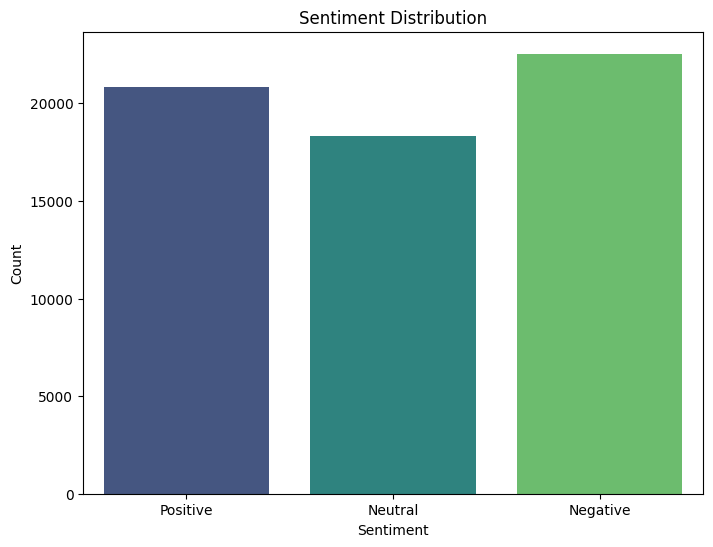

In [18]:
# Filter out any irrelevant or unexpected sentiment values
expected_sentiments = ['Positive', 'Negative', 'Neutral']
df = df[df['Sentiment'].isin(expected_sentiments)]
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### Create a word cloud

In [19]:
# Function to generate word cloud
def generate_word_cloud(df, title):
    wordcloud = WordCloud(width=400, height=400, max_words=100, background_color='white').generate(' '.join(df))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()



Postive Tweets Word Cloud

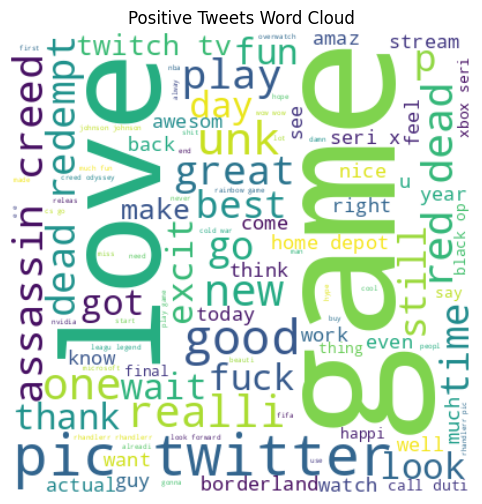

In [20]:
positive_tweets = df[df['Sentiment'] == 'Positive']['Cleaned_Tweet']
generate_word_cloud(positive_tweets, 'Positive Tweets Word Cloud')

Negative Tweets Word Cloud

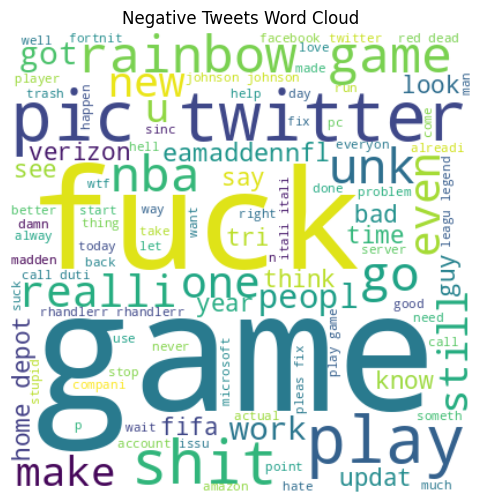

In [21]:
negative_tweets =df[df['Sentiment'] == 'Negative']['Cleaned_Tweet']
generate_word_cloud(negative_tweets, 'Negative Tweets Word Cloud')

Neutral Tweets Word Cloud

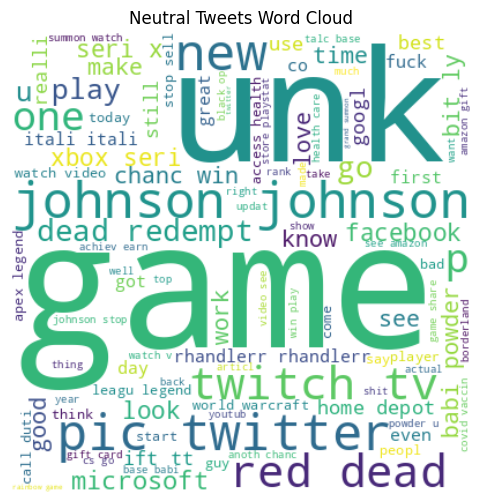

In [22]:
neutral_tweets = df[df['Sentiment'] == 'Neutral']['Cleaned_Tweet']
generate_word_cloud(neutral_tweets, 'Neutral Tweets Word Cloud')